### IMPORTING LIBRARIES 

In [1]:
!pip install contractions

In [2]:
!pip install wordcloud


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import contractions
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams

### LOADING THE DATASET 

In [4]:
df=pd.read_csv('../data/mbti_1.csv')

### SHOWING THE TOP 5 ROWS

In [5]:
df.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

### SHAPE

In [6]:
df.shape 

(8675, 2)

### DESCRIBE

In [7]:
df.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

### INFORMATION

In [8]:
df.info

<bound method DataFrame.info of       type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]>

### CLASS DISTRIBUTION

In [9]:
_classes = df.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [10]:
def show_class_distribution(df, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, df=df, palette=palette)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

C:\Users\SREE GANESHA\AppData\Local\Temp\ipykernel_4116\855012746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)  # Ensure you pass 'data=df'


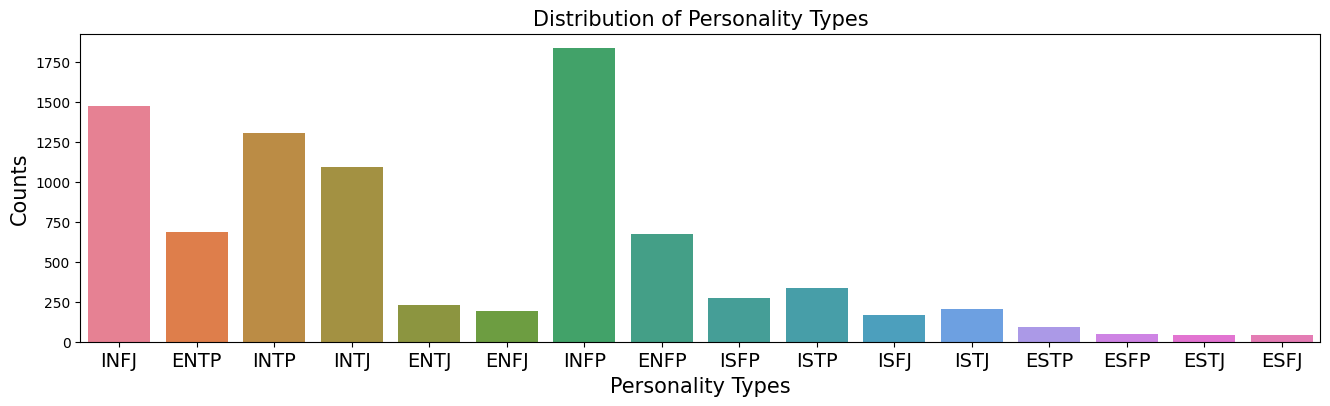

In [11]:
def show_class_distribution(df, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=df, palette=palette)  # Ensure you pass 'data=df'
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.title(title, size=15)
    plt.xticks(size=xticks_size)
    plt.show()

# Call the function with the correct column name
show_class_distribution(df, xticks_size=14)


#### E-I: Extraversion (E) vs. Introversion (I)

In [12]:
def divide_types(df):
    # Add the new columns for each type
    df["E-I"] = ""
    df["N-S"] = ""
    df["F-T"] = ""
    df["J-P"] = ""
    
    # Iterate over each row and update the new columns
    for index, row in df.iterrows():
        df.at[index, "E-I"] = "E" if row["type"][0] == "E" else "I"
        df.at[index, "N-S"] = "N" if row["type"][1] == "N" else "S"
        df.at[index, "F-T"] = "F" if row["type"][2] == "F" else "T"
        df.at[index, "J-P"] = "J" if row["type"][3] == "J" else "P"
        
    return df

# Apply the function to the dataframe
df = divide_types(df)


C:\Users\SREE GANESHA\AppData\Local\Temp\ipykernel_4116\855012746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)  # Ensure you pass 'data=df'


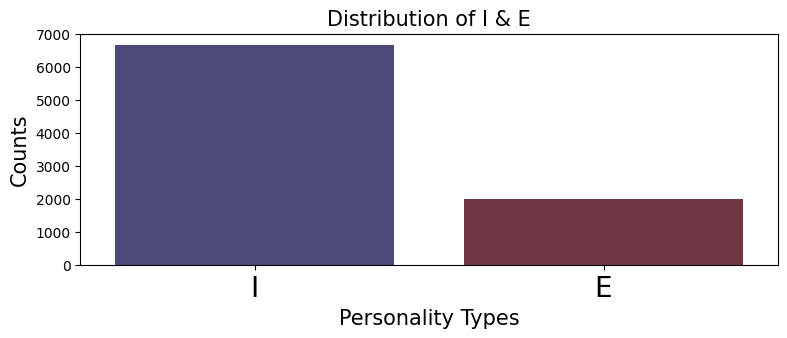

In [13]:
show_class_distribution(df, x="E-I", title="Distribution of I & E", figsize=(9,3), xticks_size=20, palette="icefire")

#### N-S: Intuition (N) vs. Sensing (S)

C:\Users\SREE GANESHA\AppData\Local\Temp\ipykernel_4116\855012746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)  # Ensure you pass 'data=df'


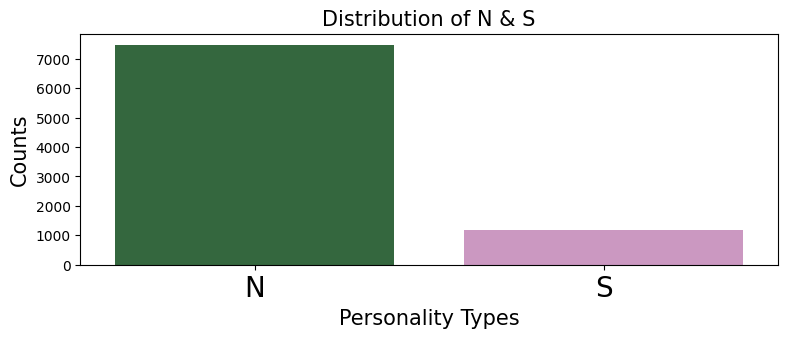

In [14]:
show_class_distribution(df, x="N-S", title="Distribution of N & S", figsize=(9,3), xticks_size=20, palette="cubehelix")

#### F-T: Feeling (F) vs. Thinking (T)

C:\Users\SREE GANESHA\AppData\Local\Temp\ipykernel_4116\855012746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)  # Ensure you pass 'data=df'


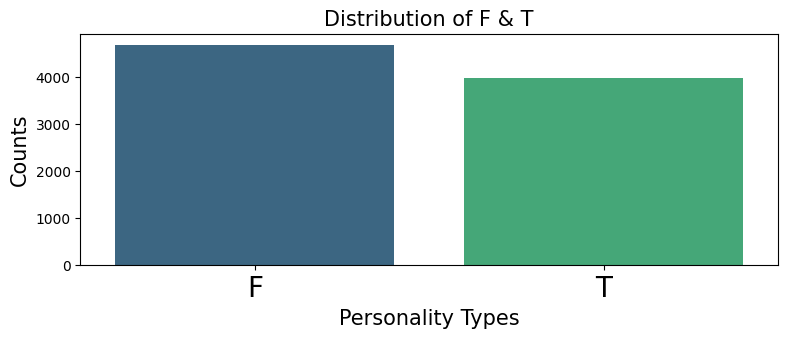

In [15]:
show_class_distribution(df, x="F-T", title="Distribution of F & T", figsize=(9,3), xticks_size=20, palette="viridis")

#### J-P: Judging (J) vs. Perceiving (P)

C:\Users\SREE GANESHA\AppData\Local\Temp\ipykernel_4116\855012746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)  # Ensure you pass 'data=df'


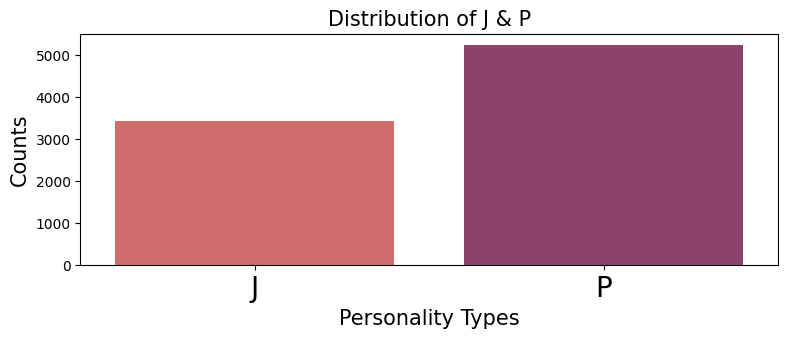

In [16]:
show_class_distribution(df, x="J-P", title="Distribution of J & P", figsize=(9,3), xticks_size=20, palette="flare")

In [17]:
df.loc[7, "posts"]

"'I tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called  'Everything' from there it get sorted into type and sub type|||i ike to collect odd objects, even at work...a lot of people would call it junk but i like to collect it.  Old unused software? ill take that off your hands :) i have a bunch of old adobe...|||i think its quite normal, i tend to only see my friends in real life every couple of months, as said earlier some people just dont get it but the good ones do :)  Edit: i mostly mean tolerate it...|||where do we go when we sleep? is dreaming another form of being awake? how many more layers of this are there if any?   thoughts about sleep keep me up at night  Edit: sometimes im too scared...|||thanks|||i wish i was free to follow my interests as i desired  i feel as though wishes are meant for impossible things|||by seeing do you mean visual interpreting or seeing as in mentally understanding the concept?|||hello|||

### CLEANING

In [18]:
def fix_contractions(df, column_name = "posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(lambda x: contractions.fix(x))
    return df

df = fix_contractions(df)

In [19]:
def clean_data(df, column_name = "cleaned_post"):
    df[column_name] = df[column_name].apply(lambda x: x.lower())
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'#([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r' +', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: " ".join([word for word in x.split() if not len(word) <3]))
    return df

df = clean_data(df)
     

### CLEANED POST

In [20]:
df.loc[7,"cleaned_post"]

'tend build collection things desktop that use frequently and then move them into folder called everything from there get sorted into type and sub type ike collect odd objects even work lot people would call junk but like collect old unused software ill take that off your hands have bunch old adobe think its quite normal tend only see friends real life every couple months said earlier some people just not get but the good ones edit mostly mean tolerate where when sleep dreaming another form being awake how many more layers this are there any thoughts about sleep keep night edit sometimes too scared thanks wish was free follow interests desired feel though wishes are meant for impossible things seeing you mean visual interpreting seeing mentally understanding the concept hello feel though incapable creating anything and wish could cannot stand the interviewer christ that laugh intj hmmm would interesting see intj this show doubt they would that interesting the general public though know

#### WORD COUNT OF CLEANED POST 

In [21]:
df["words_count"] = df["cleaned_post"].apply(lambda x: len(x.split()))
df.head(5)

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  
0  and intj moments sportscenter not top ten play...          454  
1  finding the lack these posts very alarming sex...          874  
2  good one course which say know that blessing a...          653  
3  dear intp enjoyed our conversation the other d...          820  
4  you are fired that another silly misconception...          782

In [22]:
def plot_counts(df, column, xlabel):
    fig = plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    df[column].plot.hist(bins=25)

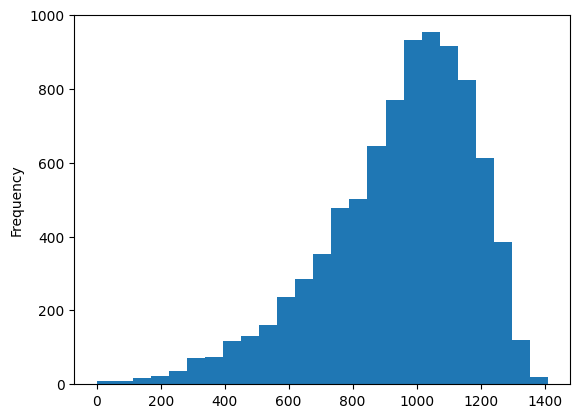

In [23]:
plot_counts(df, column="words_count", xlabel="Words Count")

#### CHARACTER COUNT IN POST

In [24]:
df["char_count"] = df["cleaned_post"].apply(lambda x: len(x))
df.head(5)

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  
0  and intj moments sportscenter not top ten play...          454        2764  
1  finding the lack these posts very alarming sex...          874        5104  
2  good one course which say know that blessing a...          653        4000  
3  dear intp enjoyed our conversation the other d...          820        4938  
4  you are fired that another silly misconception...          782        4692

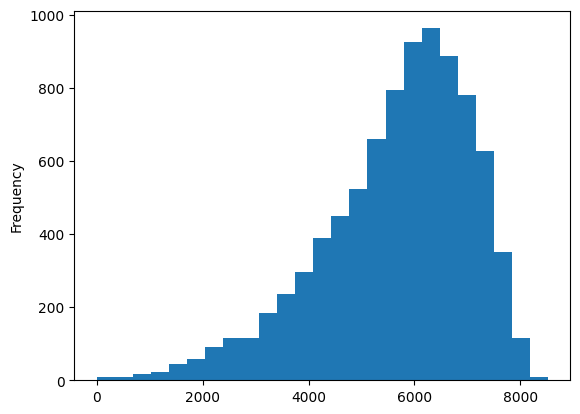

In [25]:
plot_counts(df, column="char_count", xlabel="Character Count")

### MOST FREQUENT WORDS

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stopword_list = stopwords.words("english")

In [28]:
def get_most_frequent(df, stop_words, column="cleaned_post", top=25):
    df = df[column].apply(lambda x: " ".join([word for word in x.split() if not word in stop_words]))
    counter = Counter(" ".join(df).split())
    return counter.most_common(top)

In [29]:
most_frequents = get_most_frequent(df, stopword_list)
most_frequents[:10]

[('like', 69678),
 ('would', 52964),
 ('think', 49837),
 ('people', 48150),
 ('know', 38174),
 ('one', 37173),
 ('really', 35343),
 ('get', 30806),
 ('time', 27610),
 ('feel', 23337)]

In [30]:
def show_most_frequents(most_frequent_words, top=20):
    most_frequent_df = pd.DataFrame(most_frequent_words)    
    plt.figure(figsize=(16,4))
    my_cmap = plt.get_cmap("viridis")
    plt.bar(x=most_frequent_df.iloc[:top, 0], height=most_frequent_df.iloc[:top, 1], color="slateblue")
    plt.xlabel("Words", size=17)
    plt.ylabel("Counts", size=17)
    plt.title("Most Frequent Words", size = 20)
    plt.show()

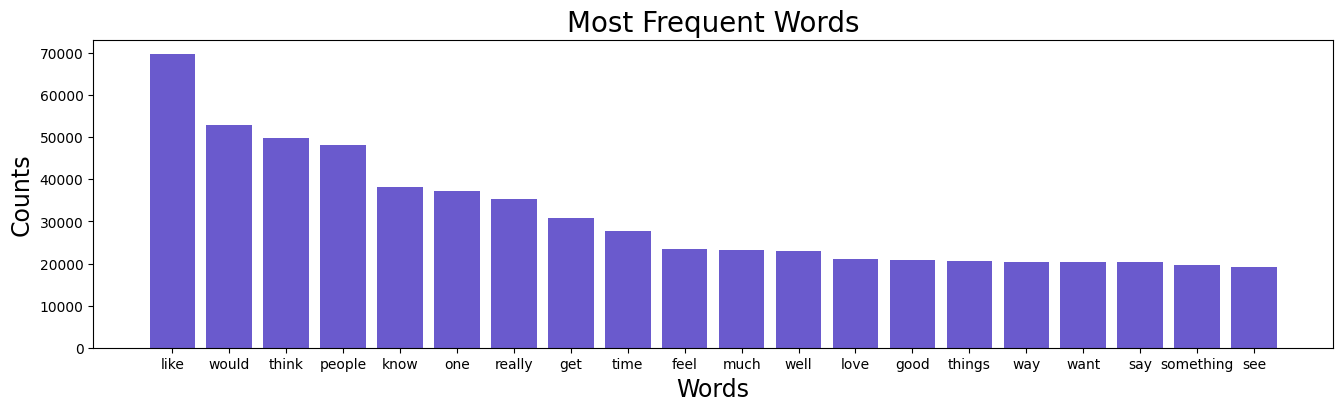

In [31]:
show_most_frequents(most_frequents)

### WORD CLOUDS

In [32]:
def show_wordcloud(data, stopword_list, column="cleaned_post"):
    fig = plt.figure(figsize=(15,5))
    wordcloud = WordCloud(background_color="black", min_font_size=5, stopwords=stopword_list).generate(data[column].to_string())
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

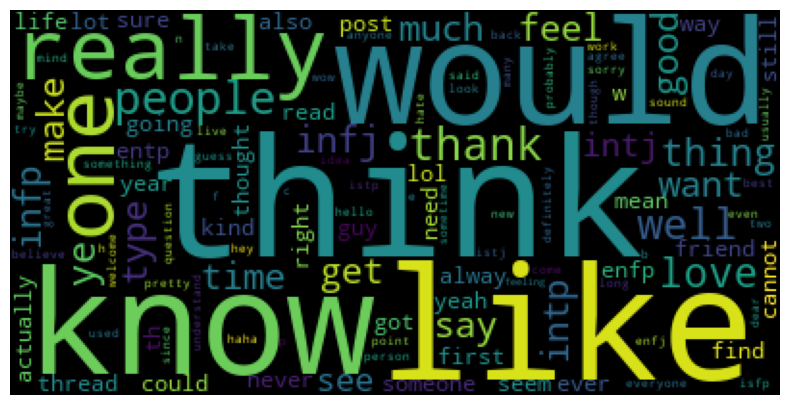

In [33]:
show_wordcloud(df, stopword_list)

In [34]:
def show_sub_wordclouds(data, type_column, column, size, fig_size=(20,15)):
    classes = df[type_column].unique()
    fig, ax = plt.subplots(len(classes), figsize=fig_size)
    j = 0
    for _class in classes:
        temp = df[df[type_column] == _class]
        wordcloud = WordCloud(background_color="black").generate(temp[column].to_string())
        plt.subplot(*size, j+1)
        plt.title(_class, size=25)
        plt.imshow(wordcloud)
        plt.axis("off")
        j+=1

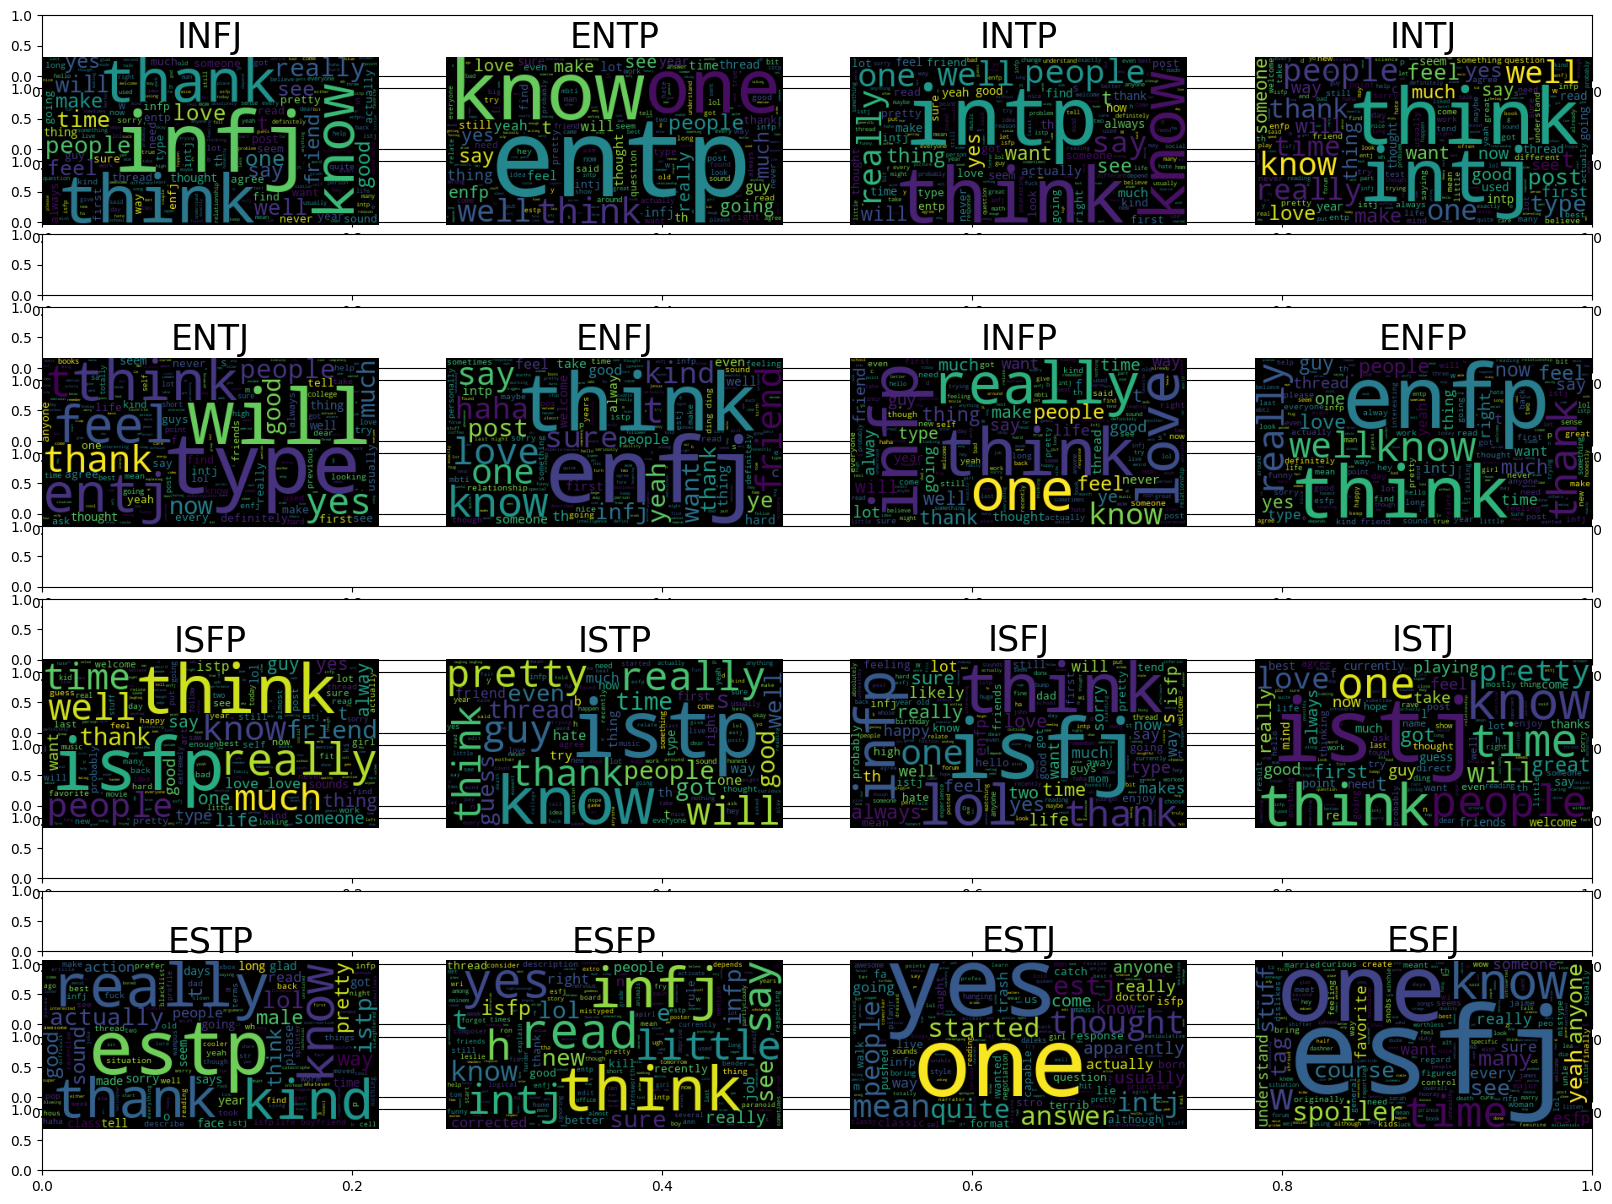

In [35]:
show_sub_wordclouds(df, type_column="type" , column="cleaned_post", size=(4,4))
     

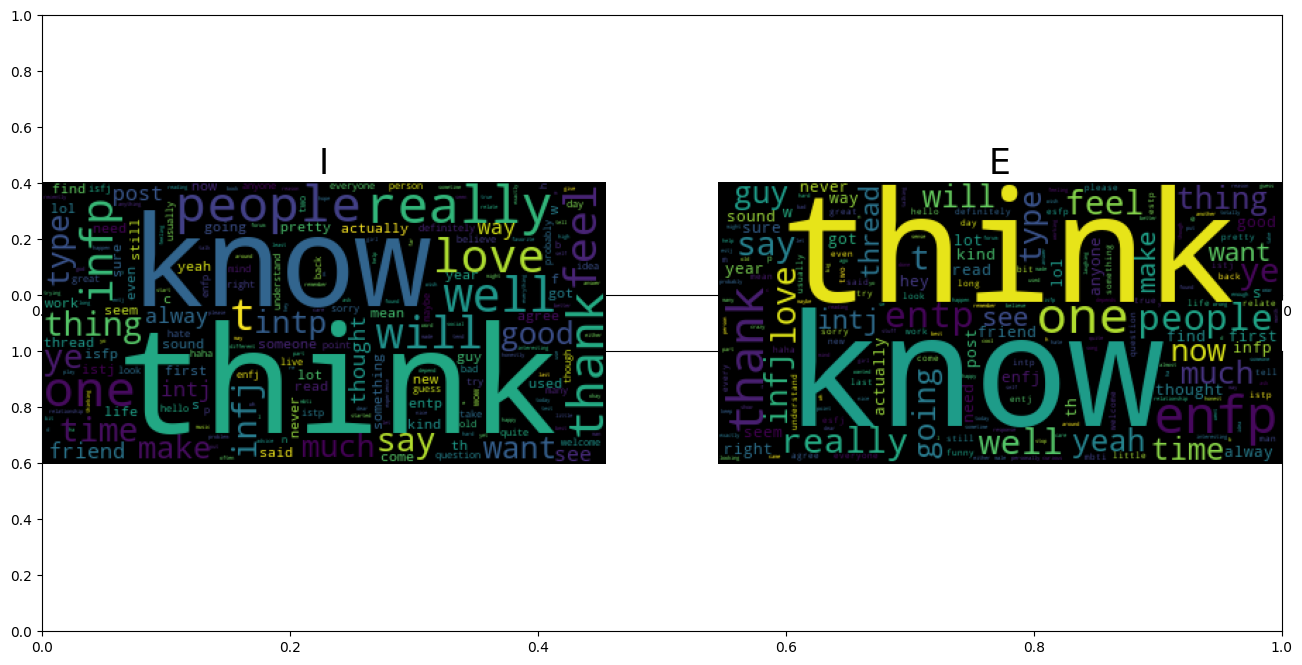

In [36]:
show_sub_wordclouds(df, type_column="E-I" , column="cleaned_post", size=(1,2), fig_size=(16,8))

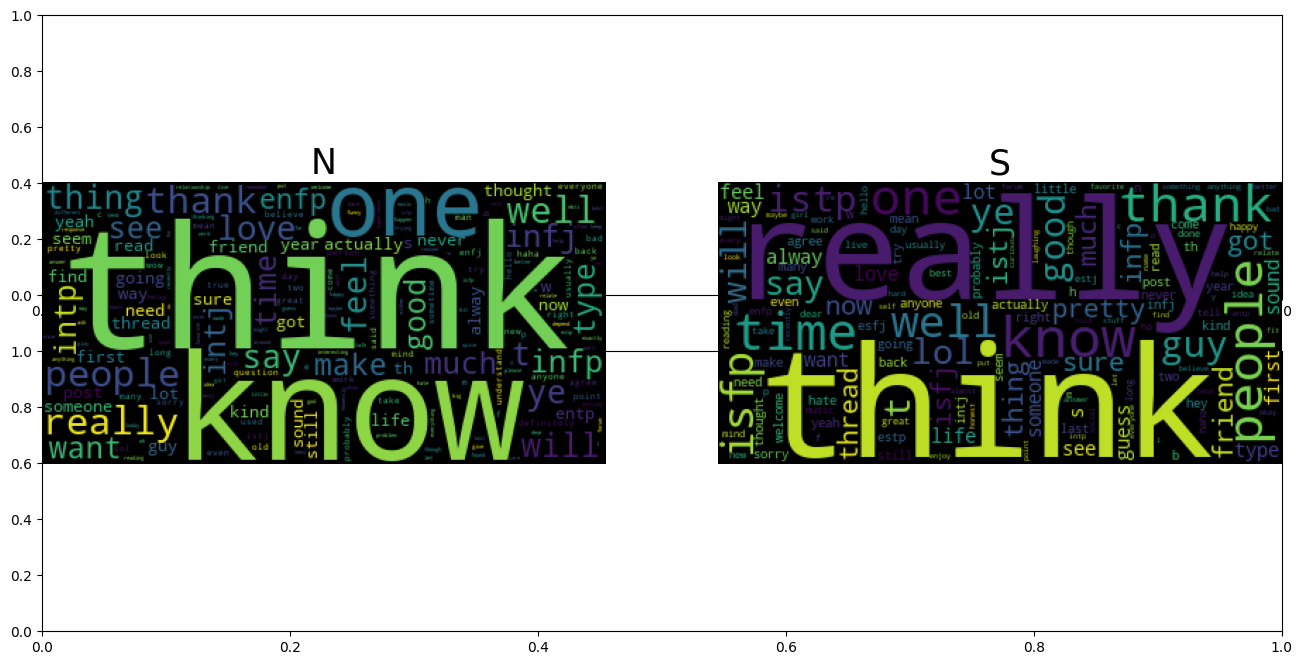

In [37]:
show_sub_wordclouds(df, type_column="N-S" , column="cleaned_post", size=(1,2), fig_size=(16,8))


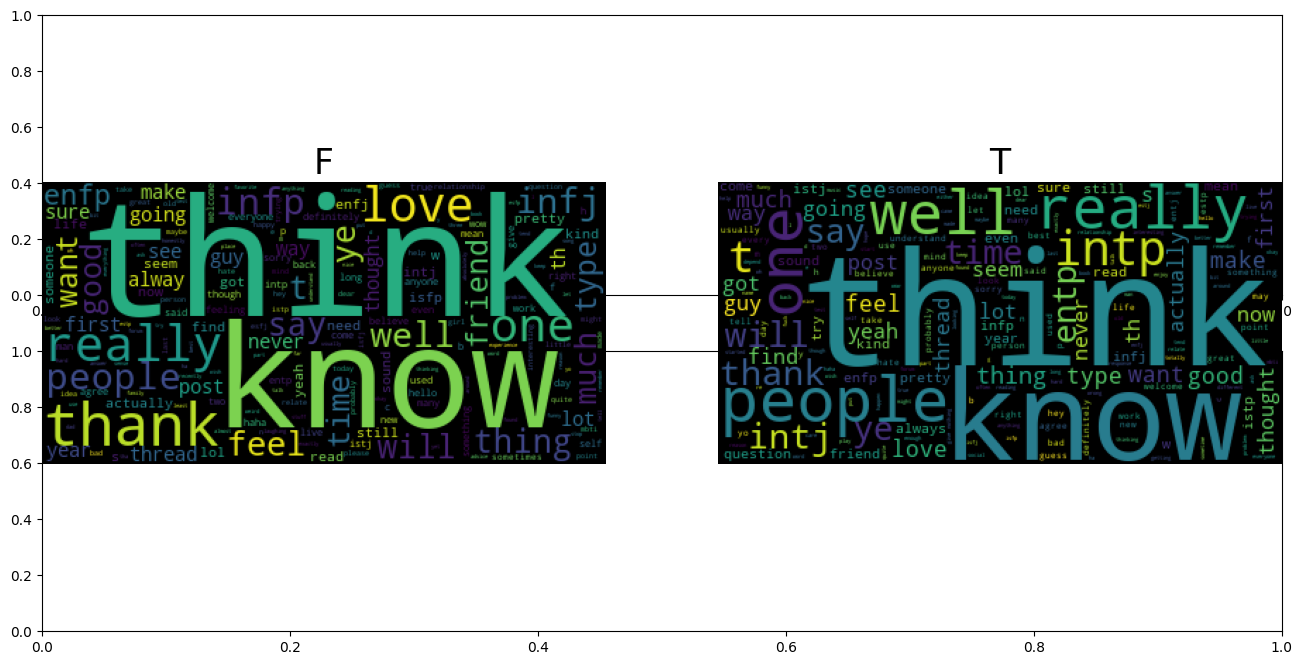

In [38]:
show_sub_wordclouds(df, type_column="F-T" , column="cleaned_post", size=(1,2), fig_size=(16,8))

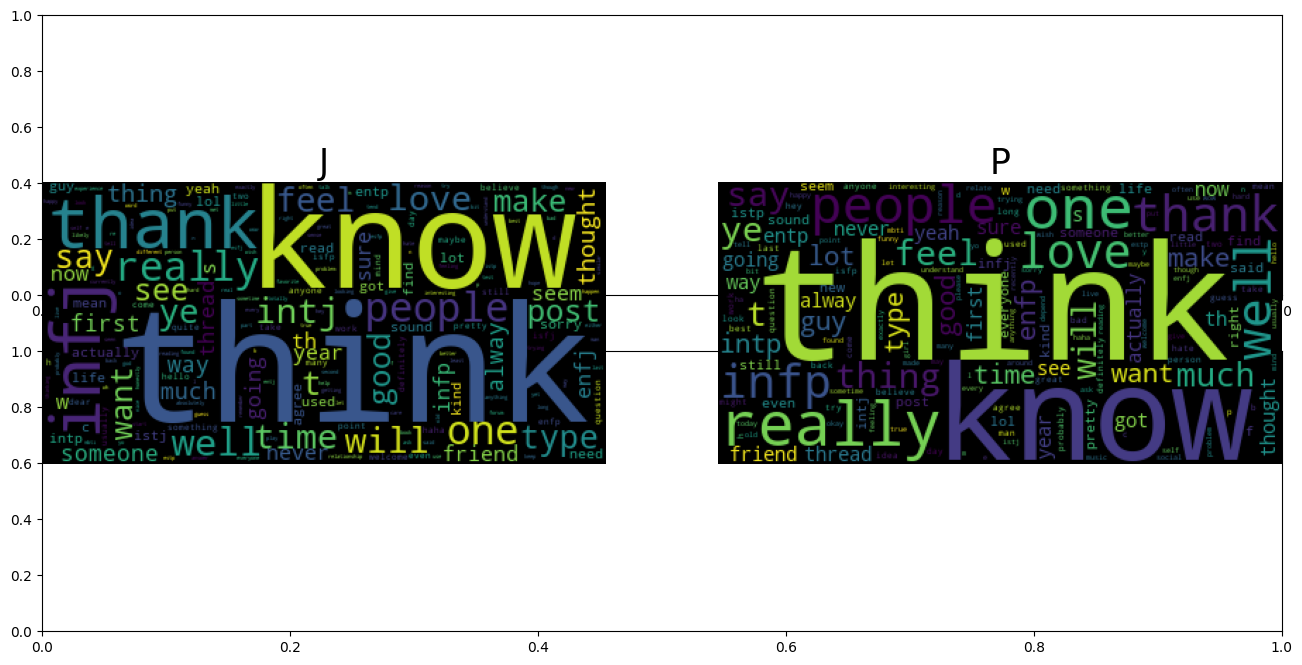

In [39]:
show_sub_wordclouds(df, type_column="J-P" , column="cleaned_post", size=(1,2), fig_size=(16,8))

### N-GRAMS

In [40]:
def get_ngrams(df, n_gram, new_column, column="cleaned_post"):
    df["tokenized"]  = df[column].apply(lambda x: x.split())
    df["sw_removal"] = df["tokenized"].apply(lambda x: [y for y in x if not y in stopword_list])
    df[new_column]   = df["sw_removal"].apply(lambda x: list(ngrams(x, n_gram)))
    df.drop(columns  = ["tokenized", "sw_removal"], inplace=True)
    return df
     

In [41]:
df = get_ngrams(df, n_gram=2, new_column="bigrams")
df.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  and intj moments sportscenter not top ten play...          454        2764   
1  finding the lack these posts very alarming sex...          874        5104   
2  good one course which say know that blessing a...          653        4000   
3  dear intp enjoyed our conversation the other d...          820        4938   
4  you are fired that another silly misconception...          782        4692   

                                             bigrams  
0  [(intj, moments), (moments, sportscenter), (sp...  
1  [(finding, lack), (lack, posts), (posts, alarm...  
2  [(good, one), (one, course), (course, say), (s...  
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...  
4  [(fired, another), (another, silly), (silly, m...

In [42]:
df = get_ngrams(df, n_gram=3, new_column="trigrams")
df.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  and intj moments sportscenter not top ten play...          454        2764   
1  finding the lack these posts very alarming sex...          874        5104   
2  good one course which say know that blessing a...          653        4000   
3  dear intp enjoyed our conversation the other d...          820        4938   
4  you are fired that another silly misconception...          782        4692   

                                             bigrams  \
0  [(intj, moments), (moments, sportscenter), (sp...   
1  [(finding, lack), (lack, posts), (posts, alarm...   
2  [(good, one), (one, course), (course, say), (s...   
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...   
4  [(fired, another), (another, silly), (silly, m...   

                                            trigrams  
0  [(intj, moments, sportscenter), (moments, spor...  
1  [(finding, lack, posts), (lack, posts, alarmin...  
2  [(good, one, course), (one, course, say), (cou...  
3  [(dear, intp, enjoyed), (intp, enjoyed, conver...  
4  [(fired, another, silly), (another, silly, mis...

In [43]:
def most_common_ngram(df, column, top=20):
    temp = []
    for index, row in df.iterrows():
        temp += row[column]
    most_common = Counter(temp).most_common(top)
    return most_common

In [44]:
def plot_n_grams(ngrams, title, top=20):
    ngram_df = pd.DataFrame(ngrams)
    ngram_df.iloc[:, 0] = ngram_df.iloc[:,0].astype(str)
    plt.figure(figsize=(7,7))
    plt.barh(y=ngram_df.iloc[:top, 0], width=ngram_df.iloc[:top, 1])
    plt.xlabel("Counts", size=17)
    plt.ylabel("Pairs", size=17)
    plt.title(title, size = 20)
    plt.show() 

In [45]:
bigrams_most_common = most_common_ngram(df, "bigrams")
bigrams_most_common

[(('feel', 'like'), 5642),
 (('would', 'say'), 4073),
 (('would', 'like'), 3429),
 (('sounds', 'like'), 2606),
 (('pretty', 'much'), 2409),
 (('high', 'school'), 2216),
 (('even', 'though'), 1922),
 (('seems', 'like'), 1902),
 (('best', 'friend'), 1692),
 (('really', 'like'), 1576),
 (('think', 'would'), 1573),
 (('get', 'along'), 1551),
 (('years', 'ago'), 1460),
 (('long', 'time'), 1459),
 (('using', 'tapatalk'), 1376),
 (('personality', 'type'), 1337),
 (('someone', 'else'), 1272),
 (('many', 'people'), 1270),
 (('something', 'like'), 1267),
 (('people', 'think'), 1219)]

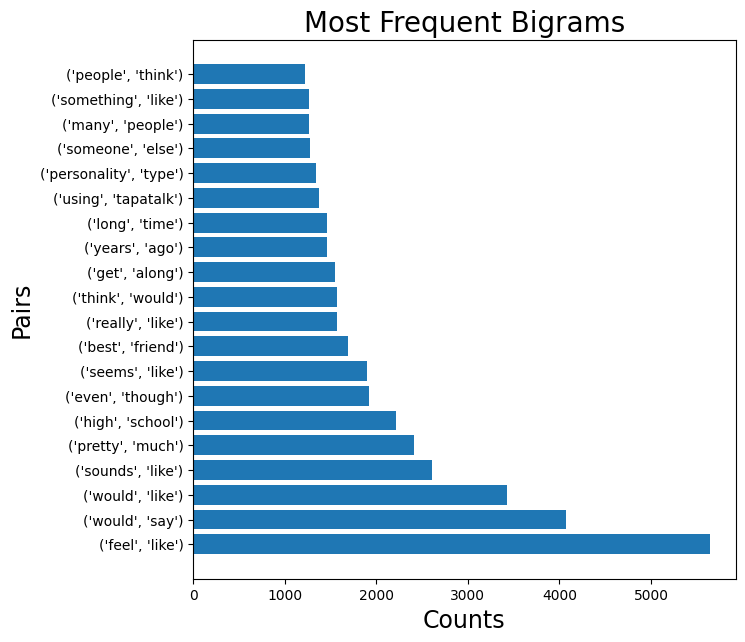

In [46]:
plot_n_grams(bigrams_most_common, title="Most Frequent Bigrams")

In [47]:
trigrams_most_common = most_common_ngram(df, "trigrams")
trigrams_most_common

[(('sent', 'iphone', 'using'), 702),
 (('iphone', 'using', 'tapatalk'), 686),
 (('sent', 'using', 'tapatalk'), 331),
 (('one', 'best', 'friends'), 280),
 (('get', 'along', 'well'), 253),
 (('sometimes', 'feel', 'like'), 207),
 (('would', 'like', 'know'), 192),
 (('long', 'time', 'ago'), 183),
 (('low', 'self', 'esteem'), 173),
 (('anything', 'may', 'affect'), 173),
 (('may', 'affect', 'way'), 171),
 (('affect', 'way', 'answer'), 168),
 (('yes', 'yes', 'yes'), 168),
 (('spend', 'lot', 'time'), 165),
 (('wikipedia', 'free', 'encyclopedia'), 162),
 (('way', 'answer', 'questions'), 158),
 (('answer', 'questions', 'example'), 150),
 (('questions', 'example', 'stressful'), 145),
 (('example', 'stressful', 'time'), 144),
 (('stressful', 'time', 'mental'), 140)]

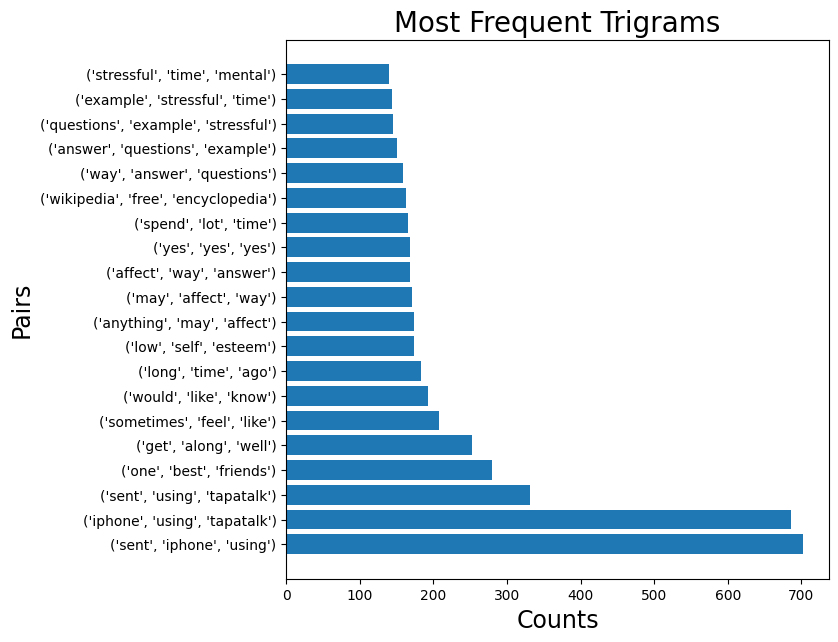

In [48]:
plot_n_grams(trigrams_most_common, title="Most Frequent Trigrams")

### PREPROCESSING

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
def remove_stopwords(df, stopword_list, column="cleaned_post"):
    df[column] = df[column].apply(word_tokenize)
    df[column] = df[column].apply(lambda x: [word for word in x if not word in stopword_list])
    return df
     

In [51]:
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
     

In [52]:
def lemmatize(df, stopword_list, column="cleaned_post"):
    df[column] = df[column].apply(apply_lemmatization)
    df[column] = df[column].apply(" ".join)
    return df

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
df = lemmatize(df, stopword_list)

In [55]:
df.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  a n d   i n t j   m o m e n t s   s p o r t s ...          454        2764   
1  f i n d i n g   t h e   l a c k   t h e s e   ...          874        5104   
2  g o o d   o n e   c o u r s e   w h i c h   s ...          653        4000   
3  d e a r   i n t p   e n j o y e d   o u r   c ...          820        4938   
4  y o u   a r e   f i r e d   t h a t   a n o t ...          782        4692   

                                             bigrams  \
0  [(intj, moments), (moments, sportscenter), (sp...   
1  [(finding, lack), (lack, posts), (posts, alarm...   
2  [(good, one), (one, course), (course, say), (s...   
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...   
4  [(fired, another), (another, silly), (silly, m...   

                                            trigrams  
0  [(intj, moments, sportscenter), (moments, spor...  
1  [(finding, lack, posts), (lack, posts, alarmin...  
2  [(good, one, course), (one, course, say), (cou...  
3  [(dear, intp, enjoyed), (intp, enjoyed, conver...  
4  [(fired, another, silly), (another, silly, mis...

### FEATURE ENGINEERING

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert bigrams & trigrams into TF-IDF vectors
vectorizer_bigram = TfidfVectorizer(analyzer=lambda x: x, max_features=5000)  # Keep most frequent 5000
vectorizer_trigram = TfidfVectorizer(analyzer=lambda x: x, max_features=5000)

bigrams_tfidf = vectorizer_bigram.fit_transform(df["bigrams"].astype(str)).toarray()
trigrams_tfidf = vectorizer_trigram.fit_transform(df["trigrams"].astype(str)).toarray()


In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["type_encoded"] = le.fit_transform(df["type"])  # Convert MBTI types into numbers
y = df["type_encoded"]  # Target variable


In [58]:
# Get the mapping of encoded values
type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print(type_mapping)


{'ENFJ': 0, 'ENFP': 1, 'ENTJ': 2, 'ENTP': 3, 'ESFJ': 4, 'ESFP': 5, 'ESTJ': 6, 'ESTP': 7, 'INFJ': 8, 'INFP': 9, 'INTJ': 10, 'INTP': 11, 'ISFJ': 12, 'ISFP': 13, 'ISTJ': 14, 'ISTP': 15}


In [59]:
import numpy as np

# Combine all features into X
X = np.hstack([
    df[["words_count", "char_count"]].values,  # Numeric features
    bigrams_tfidf,  # Bigrams
    trigrams_tfidf   # Trigrams
])


### TRAIN-TEST SPILIT

In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 🔹 Load Data (Assuming df contains 'cleaned_post' and 'type')
# df = pd.read_csv("your_dataset.csv")  # Uncomment if loading from file

# ✅ 1. Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english", ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df["cleaned_post"])  # Convert text to numerical features

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# ✅ 2. Encode Labels
le = LabelEncoder()
y_encoded = le.fit_transform(df["type"])  # Convert MBTI personality types to numbers

# ✅ 3. Train-Test Split (Ensure same shape)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, y_encoded, 
                                                    test_size=0.2, random_state=42, stratify=y_encoded)

# ✅ 4. Print Shapes to Verify
print("Training Data Shape:", X_train.shape)  # Should be (6940, 5000)
print("Testing Data Shape:", X_test.shape)    # Should be (1735, 5000)


Training Data Shape: (6940, 5000)
Testing Data Shape: (1735, 5000)


### FITTING MODELS AND GETTING ACCURACY

In [77]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report

# Select top 1000 features to reduce training time
selector = SelectKBest(chi2, k=1000)  # Choose top 1000 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Initialize XGBoost model with optimized parameters
xgb_model = XGBClassifier(
    n_estimators=200,              # Reduced number of estimators
    learning_rate=0.05,            # Low learning rate for stable results
    max_depth=6,                   # Limit depth to avoid overfitting
    use_label_encoder=False,       # Avoid deprecation warnings
    eval_metric="mlogloss",        # Evaluation metric for classification
    tree_method="hist",            # Use histogram method for faster training
    random_state=42
)

# Train the model on selected features
xgb_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Accuracy: {accuracy_xgb:.4f}")
print("✅ XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Accuracy: 0.6772
✅ XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.72      0.59      0.64       135
           2       0.62      0.39      0.48        46
           3       0.62      0.64      0.63       137
           4       0.00      0.00      0.00         9
           5       1.00      0.10      0.18        10
           6       1.00      0.38      0.55         8
           7       0.57      0.22      0.32        18
           8       0.68      0.74      0.71       294
           9       0.69      0.80      0.74       366
          10       0.69      0.70      0.69       218
          11       0.67      0.81      0.73       261
          12       0.64      0.48      0.55        33
          13       0.61      0.41      0.49        54
          14       0.71      0.37      0.48        41
          15       0.70      0.58      0.63        67

    accuracy        

C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [78]:
import time
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Start time measurement
start_time = time.time()

# Initialize LightGBM model with reduced hyperparameters for faster execution
lgbm_model = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model on the training data
lgbm_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_lgbm = lgbm_model.predict(X_test_selected)

# End time measurement
end_time = time.time()
execution_time = end_time - start_time

# Print results
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"✅ LightGBM Accuracy: {accuracy_lgbm:.4f}")
print("Classification Report for LightGBM:")
print(classification_report(y_test, y_pred_lgbm))

# Print execution time
print(f"Execution time: {execution_time:.2f} seconds")


✅ LightGBM Accuracy: 0.6807
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.68      0.50      0.58        38
           1       0.71      0.64      0.67       135
           2       0.69      0.43      0.53        46
           3       0.60      0.63      0.61       137
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       1.00      0.38      0.55         8
           7       0.67      0.11      0.19        18
           8       0.68      0.73      0.70       294
           9       0.68      0.80      0.73       366
          10       0.71      0.69      0.70       218
          11       0.68      0.82      0.74       261
          12       0.74      0.61      0.67        33
          13       0.61      0.37      0.46        54
          14       0.84      0.39      0.53        41
          15       0.70      0.57      0.63        67

    accuracy    

C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [79]:
import time
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Start time measurement
start_time = time.time()

# Initialize CatBoost model with reduced hyperparameters for faster execution
cat_model = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=6, verbose=0, random_state=42)

# Train the model on the training data
cat_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_cat = cat_model.predict(X_test_selected)

# End time measurement
end_time = time.time()
execution_time = end_time - start_time

# Print results
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"✅ CatBoost Accuracy: {accuracy_cat:.4f}")
print("Classification Report for CatBoost:")
print(classification_report(y_test, y_pred_cat))

# Print execution time
print(f"Execution time: {execution_time:.2f} seconds")


✅ CatBoost Accuracy: 0.6542
Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.69      0.29      0.41        38
           1       0.73      0.61      0.66       135
           2       0.70      0.30      0.42        46
           3       0.59      0.58      0.59       137
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           7       1.00      0.06      0.11        18
           8       0.67      0.72      0.69       294
           9       0.62      0.81      0.71       366
          10       0.67      0.66      0.67       218
          11       0.65      0.79      0.71       261
          12       0.75      0.45      0.57        33
          13       0.63      0.35      0.45        54
          14       0.88      0.34      0.49        41
          15       0.69      0.63      0.66        67

    accuracy    

C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SREE GANESHA\anaconda3\envs\automation\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

✅ Histogram-based Gradient Boosting Accuracy: 0.6772
Histogram-based Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.47      0.54        38
           1       0.70      0.59      0.64       135
           2       0.66      0.46      0.54        46
           3       0.61      0.61      0.61       137
           4       0.00      0.00      0.00         9
           5       1.00      0.10      0.18        10
           6       0.67      0.25      0.36         8
           7       0.56      0.28      0.37        18
           8       0.69      0.74      0.71       294
           9       0.68      0.80      0.73       366
          10       0.68      0.68      0.68       218
          11       0.68      0.80      0.74       261
          12       0.65      0.45      0.54        33
          13       0.60      0.44      0.51        54
          14       0.77      0.41      0.54        41
          15       0.77  

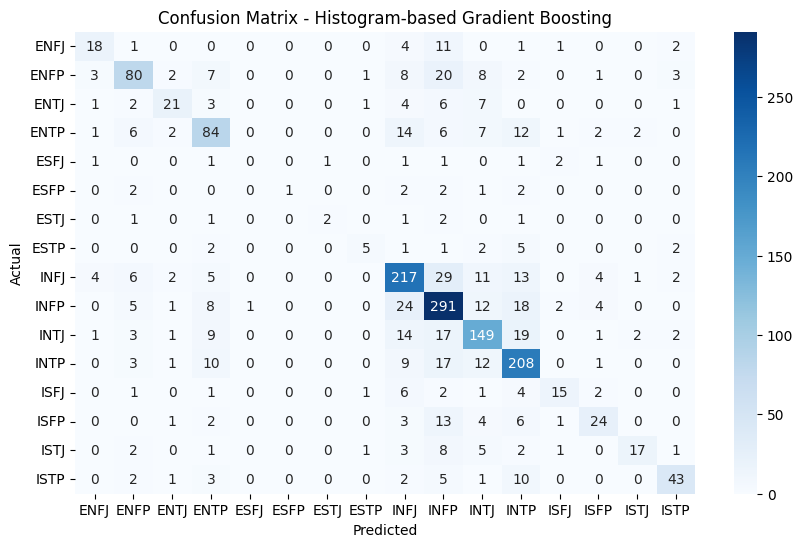

In [83]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Histogram-based Gradient Boosting model with optimizations
hist_gb_model = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.05, max_depth=4, random_state=42
                                              )

# Train the model using the training data
hist_gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_hist_gb = hist_gb_model.predict(X_test)

# Evaluate the model
accuracy_hist_gb = accuracy_score(y_test, y_pred_hist_gb)
print(f"✅ Histogram-based Gradient Boosting Accuracy: {accuracy_hist_gb:.4f}")

# Classification Report (Precision, Recall, F1-Score)
print("Histogram-based Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_hist_gb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_hist_gb)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Histogram-based Gradient Boosting")
plt.show()


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import contractions
import sklearn
import xgboost
import lightgbm
import catboost

# Print versions
print("Pandas Version:", pd.__version__)
print("NumPy Version:", np.__version__)
print("Seaborn Version:", sns.__version__)
print("Matplotlib Version:", plt.matplotlib.__version__)
print("NLTK Version:", nltk.__version__)
#print("Contractions Version:", contractions.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("XGBoost Version:", xgboost.__version__)
print("LightGBM Version:", lightgbm.__version__)
print("CatBoost Version:", catboost.__version__)


Pandas Version: 2.0.3
NumPy Version: 1.26.4
Seaborn Version: 0.13.2
Matplotlib Version: 3.8.0
NLTK Version: 3.9.1
Scikit-learn Version: 1.5.2
XGBoost Version: 2.1.2
LightGBM Version: 4.5.0
CatBoost Version: 1.2.7
